In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## TOPICS:
* STEP 1: Data pre processing- Exploratory data analysis, Feature engineering
* STEP 2: Model creation
* STEP 3: Model evaluation

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## STEP 1: Data pre processing- Exploratory data analysis, Feature engineering

In [483]:
df = pd.read_csv('DATA/02_data_regression_kc_house_data.csv')

In [484]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [485]:
#data size
len(df)

21597

In [486]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [487]:
#see if there is any missing data fields
df.isnull().sum() #sum across all the features for non zero data memmers
#seems there is no missing elements in the data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [488]:
#show data statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [489]:
#features
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

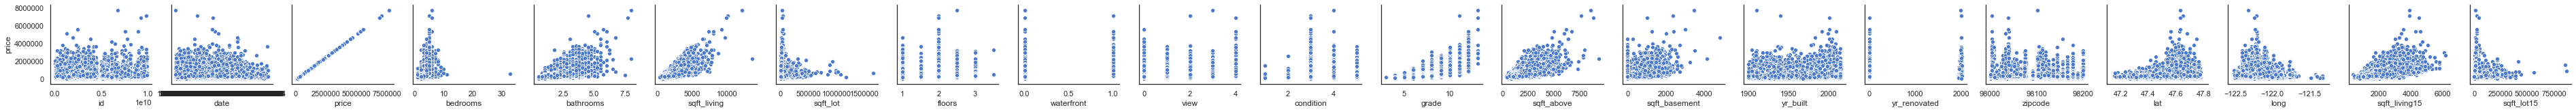

In [490]:
#pair plot for o/p vs features to know any features which are highly correlated
sns.pairplot(data = df, x_vars=df.columns, y_vars = 'price')

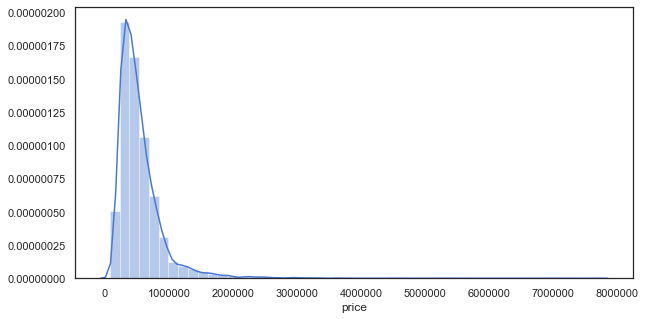

In [491]:
#label data analysis - histogram
plt.figure(figsize = (10, 5))
sns.distplot(df['price'])

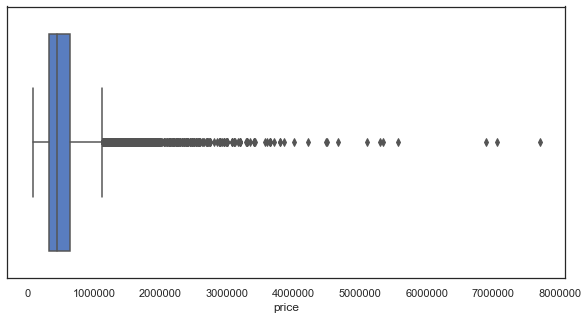

In [492]:
#label data analysis - box plot for outlier analysis
plt.figure(figsize = (10, 5))
sns.boxplot(df['price'])

In [493]:
#label data analysis - seems there is lot of outlier data for very large prices 
df.sort_values(by = 'price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [494]:
'''

#label data analysis - seems there is lot of outlier data for very large prices 
#Removing outlier data - 1%
start_index = int(0.1*len(df)/100)
df = df.sort_values(by = 'price', ascending = False)[start_index:]
df.head()

'''

"\n\n#label data analysis - seems there is lot of outlier data for very large prices \n#Removing outlier data - 1%\nstart_index = int(0.1*len(df)/100)\ndf = df.sort_values(by = 'price', ascending = False)[start_index:]\ndf.head()\n\n"

In [495]:
#STEP 2 : Feature engineering - analyse each and every feature

In [496]:
#Feature 1 - id - unique transaction id - it is not relevant to predict output
#dropping irrelevant features
df = df.drop('id', axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [497]:
#Feature 2 - date
#Convert date time data in to more readable format to analyse it further
df['date_time'] = pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_time
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18


In [498]:
#Feature engineering - Feature 2 - date time
#Further split newly converted date time colun in to two seperate features apply function

df['year'] = df['date_time'].apply(lambda date : date.year)
df['month'] = df['date_time'].apply(lambda date : date.month)
#drop old date column
df = df.drop('date', axis = 1)
df = df.drop('date_time', axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


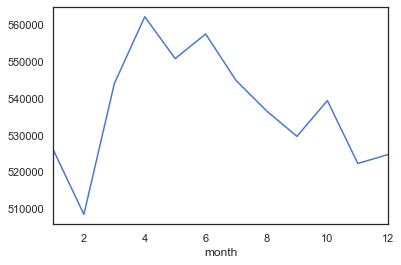

In [499]:
#Exploratory data analysis on feature - date
#check if ther is any relation b/w month vs price
df.groupby('month').mean()['price'].plot()

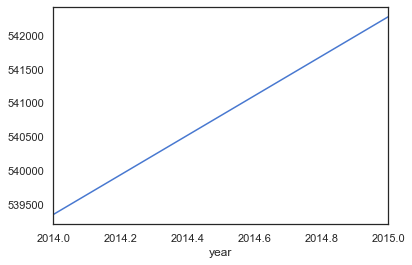

In [500]:
#check of there is any relation b/w year vs price
df.groupby('year').mean()['price'].plot()
#it is expected there will be a price rise with year, unless there is some crisis

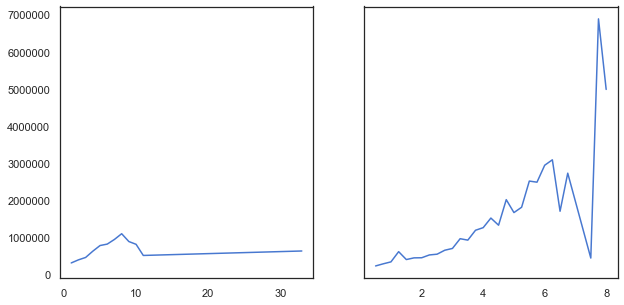

In [501]:
#Check the importance of the features - nuber of 'bedrooms', 'bathrooms'
#using subplots to represent this information
fig, axes = plt.subplots(1, 2, figsize = (10,5), sharey = True)
sns.lineplot(data = df.groupby('bedrooms').mean()['price'], ax = axes[0])
sns.lineplot(data = df.groupby('bathrooms').mean()['price'], ax = axes[1])

[Text(0.5, 0, 'sqft_basement')]

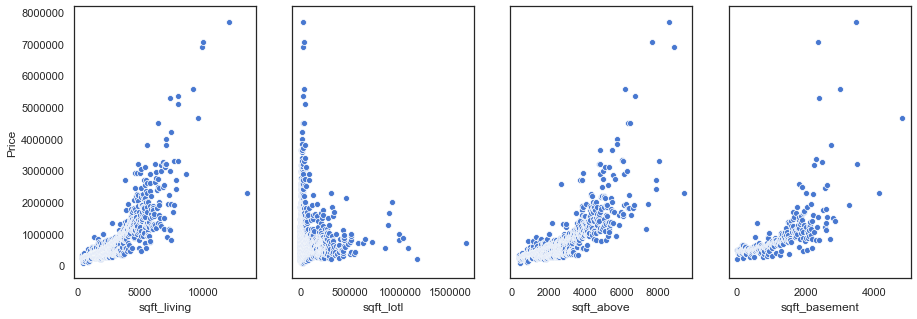

In [502]:
#Check the importance of the features - 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'
#using subplots to represent this information
fig, axes = plt.subplots(1, 4, figsize = (15,5), sharey = True)
sns.scatterplot(data = df.groupby('sqft_living').mean()['price'], ax = axes[0])
sns.scatterplot(data = df.groupby('sqft_lot').mean()['price'], ax = axes[1])
sns.scatterplot(data = df.groupby('sqft_above').mean()['price'], ax = axes[2])
sns.scatterplot(data = df.groupby('sqft_basement').mean()['price'], ax = axes[3])
axes[0].set(xlabel="sqft_living", ylabel = "Price")
axes[1].set(xlabel="sqft_lotl")
axes[2].set(xlabel="sqft_above")
axes[3].set(xlabel="sqft_basement")

In [503]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

[Text(0.5, 0, 'grade')]

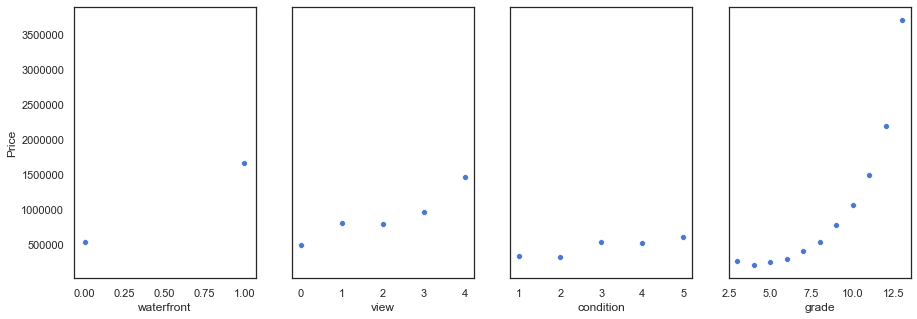

In [504]:
#Check the importance of the features - 'waterfront', 'view', 'condition', 'sqft_basement'
#using subplots to represent this information
fig, axes = plt.subplots(1, 4, figsize = (15,5), sharey = True)
sns.scatterplot(data = df.groupby('waterfront').mean()['price'], ax = axes[0])
sns.scatterplot(data = df.groupby('view').mean()['price'], ax = axes[1])
sns.scatterplot(data = df.groupby('condition').mean()['price'], ax = axes[2])
sns.scatterplot(data = df.groupby('grade').mean()['price'], ax = axes[3])
axes[0].set(xlabel="waterfront", ylabel = "Price")
axes[1].set(xlabel="view")
axes[2].set(xlabel="condition")
axes[3].set(xlabel="grade")

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'yr_built')]

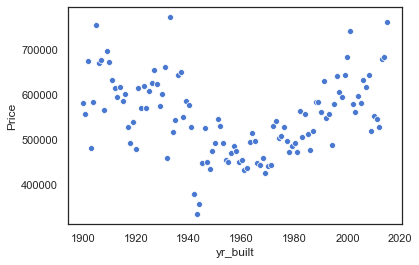

In [505]:
#Check the importance of the feature - 'yr_built'
sns.scatterplot(data = df.groupby('yr_built').mean()['price']).set(xlabel="yr_built", ylabel = "Price")

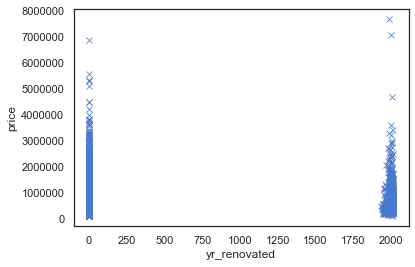

In [506]:
#Check the importance of the feature - 'yr_renovated'
# could make sense due to scaling, higher should correlate to more value
sns.scatterplot(x = 'yr_renovated', y = 'price', data = df, edgecolor = None, marker = 'x')

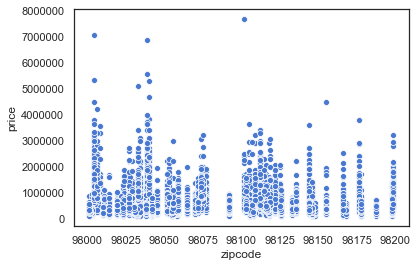

In [507]:
#Check the importance of the feature - 'zipcode'
sns.scatterplot(x = 'zipcode', y = 'price', data = df)

In [508]:
#Feature enginnering - Clearly zipcode is not a continuous variable feature
#Zipcode needs to be treated as categorical or ignore (incase these are other feature that represents location of the city)
#In this problem, latitude and longlongitude location coordinates are given as features, those can be used inplace of zipcode

#dropping xipcode feature
df.drop('zipcode', axis = 1, inplace = True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

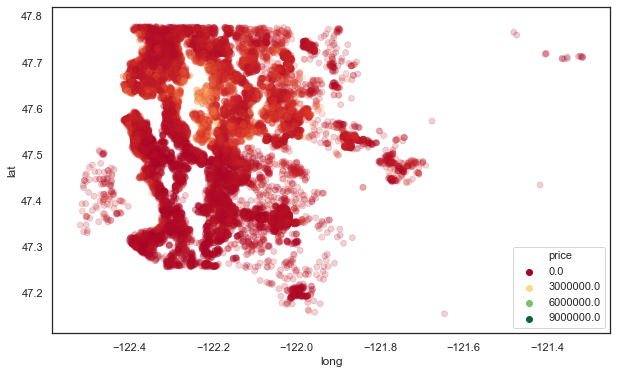

In [509]:
#Check the importance of the loction features - 'lat, long'
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price', palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

## STEP2 - Model creation and training

In [510]:
#Test train data split
from sklearn.model_selection import train_test_split
X = df.drop('price', axis = 1).values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#help(train_test_split)

In [511]:
#Scale features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [512]:
#model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
num_feat = X_test.shape[1] #number of features
#Hidden layers
model.add(Dense(num_feat, activation = 'relu')) #have activation units atleast the no. of features  
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
#Out put layer
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

## STEP 3 - Model evaluation

In [513]:
model.fit(X_train, y_train, batch_size = 128, epochs = 200, validation_data = (X_test, y_test))

Train on 15117 samples, validate on 6480 samples
Epoch 1/200
15117/15117 [==============================] - 2s 129us/sample - loss: 429752514793.6971 - val_loss: 420129467738.3902
Epoch 2/200
15117/15117 [==============================] - 1s 42us/sample - loss: 429577369664.6223 - val_loss: 419618476507.3383
Epoch 3/200
15117/15117 [==============================] - 1s 34us/sample - loss: 428062750108.3231 - val_loss: 416611523333.6889
Epoch 4/200
15117/15117 [==============================] - 0s 27us/sample - loss: 422176800560.9918 - val_loss: 407067952641.2642
Epoch 5/200
15117/15117 [==============================] - 1s 39us/sample - loss: 407057682802.3931 - val_loss: 385953095781.1358
Epoch 6/200
15117/15117 [==============================] - 0s 31us/sample - loss: 378250246954.2856 - val_loss: 349786474389.8075
Epoch 7/200
15117/15117 [==============================] - 0s 25us/sample - loss: 333688533153.7591 - val_loss: 298546081640.2963
Epoch 8/200
15117/15117 [===============

Epoch 64/200
15117/15117 [==============================] - 0s 32us/sample - loss: 50414828349.7943 - val_loss: 52392770350.1432
Epoch 65/200
15117/15117 [==============================] - 0s 24us/sample - loss: 50058235716.3649 - val_loss: 52034757194.5877
Epoch 66/200
15117/15117 [==============================] - 0s 25us/sample - loss: 49706202430.3023 - val_loss: 51709727458.2914
Epoch 67/200
15117/15117 [==============================] - 1s 47us/sample - loss: 49408212600.2016 - val_loss: 51380852619.6938
Epoch 68/200
15117/15117 [==============================] - 1s 33us/sample - loss: 49086047409.4066 - val_loss: 51079980656.5136
Epoch 69/200
15117/15117 [==============================] - 0s 33us/sample - loss: 48793572536.2482 - val_loss: 50799273372.1284
Epoch 70/200
15117/15117 [==============================] - 1s 36us/sample - loss: 48526685631.0051 - val_loss: 50511521786.9432
Epoch 71/200
15117/15117 [==============================] - 0s 28us/sample - loss: 48242837380.88

15117/15117 [==============================] - 0s 33us/sample - loss: 39325558926.2504 - val_loss: 41130556995.0025
Epoch 128/200
15117/15117 [==============================] - 0s 32us/sample - loss: 39241029156.4771 - val_loss: 41027682526.4988
Epoch 129/200
15117/15117 [==============================] - 0s 32us/sample - loss: 39124418327.0480 - val_loss: 40939469664.7111
Epoch 130/200
15117/15117 [==============================] - 0s 31us/sample - loss: 39022909816.7605 - val_loss: 40843409008.5136
Epoch 131/200
15117/15117 [==============================] - 0s 24us/sample - loss: 38926822588.3802 - val_loss: 40737510235.6543
Epoch 132/200
15117/15117 [==============================] - 0s 27us/sample - loss: 38836279472.2551 - val_loss: 40641040394.1136
Epoch 133/200
15117/15117 [==============================] - 0s 29us/sample - loss: 38757814070.5463 - val_loss: 40554257531.8914
Epoch 134/200
15117/15117 [==============================] - 0s 27us/sample - loss: 38650220937.3564 - v

Epoch 190/200
15117/15117 [==============================] - 0s 22us/sample - loss: 34421356254.6219 - val_loss: 36244987039.2889
Epoch 191/200
15117/15117 [==============================] - 0s 22us/sample - loss: 34386137864.5520 - val_loss: 36200749243.1012
Epoch 192/200
15117/15117 [==============================] - 0s 21us/sample - loss: 34333619829.0857 - val_loss: 36160495878.9531
Epoch 193/200
15117/15117 [==============================] - 0s 21us/sample - loss: 34361435326.9543 - val_loss: 36118496900.7407
Epoch 194/200
15117/15117 [==============================] - 0s 21us/sample - loss: 34232619965.8197 - val_loss: 36068125622.6765
Epoch 195/200
15117/15117 [==============================] - 0s 21us/sample - loss: 34201513119.0495 - val_loss: 36060444257.3432
Epoch 196/200
15117/15117 [==============================] - 0s 22us/sample - loss: 34176439900.6999 - val_loss: 36015683336.2173
Epoch 197/200
15117/15117 [==============================] - 0s 21us/sample - loss: 341629

In [514]:
model_history = pd.DataFrame(model.history.history)

In [515]:
model_history.head()

,loss,val_loss
0,4.297525e+11,4.201295e+11
1,4.295774e+11,4.196185e+11
2,4.280628e+11,4.166115e+11
3,4.221768e+11,4.070680e+11
4,4.070577e+11,3.859531e+11


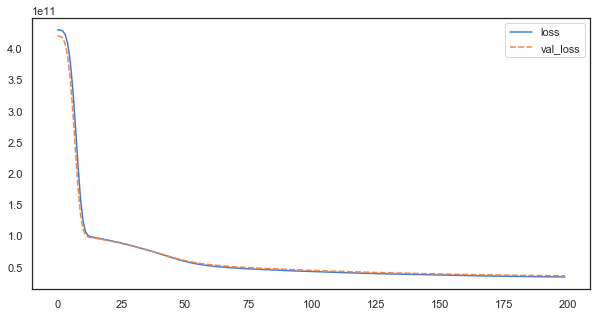

In [516]:
#evaluation plots
plt.figure(figsize = (10, 5))
sns.lineplot(data = model_history)

In [517]:
'''
observations: 
    1. Training loss and testing loss are following the same pattern
    2. After end of the training, the loss is very high 
        => High bias problem => need more layers
'''
#Training the model further with more number of layers
model = Sequential()
num_feat = X_test.shape[1] #number of features
#Hidden layers
model.add(Dense(num_feat, activation = 'relu')) #have activation units atleast the no. of features  
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
#Out put layer
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')
 # as batch size increses, training becomes faster
model.fit(X_train, y_train, batch_size = 128, epochs = 200, validation_data = (X_test, y_test))

Train on 15117 samples, validate on 6480 samples
Epoch 1/200
15117/15117 [==============================] - 2s 108us/sample - loss: 429704044607.4030 - val_loss: 419800265927.7432
Epoch 2/200
15117/15117 [==============================] - 0s 29us/sample - loss: 421309063988.9883 - val_loss: 386786788137.0864
Epoch 3/200
15117/15117 [==============================] - 0s 29us/sample - loss: 283187055650.2078 - val_loss: 131248038393.6790
Epoch 4/200
15117/15117 [==============================] - 0s 29us/sample - loss: 103820630548.2876 - val_loss: 97564811122.4099
Epoch 5/200
15117/15117 [==============================] - 0s 29us/sample - loss: 96901724948.2030 - val_loss: 94787436007.9802
Epoch 6/200
15117/15117 [==============================] - 0s 29us/sample - loss: 94040339024.8457 - val_loss: 92079692842.9827
Epoch 7/200
15117/15117 [==============================] - 0s 29us/sample - loss: 91055055066.3883 - val_loss: 89212427489.0272
Epoch 8/200
15117/15117 [======================

15117/15117 [==============================] - 0s 33us/sample - loss: 33025918361.0716 - val_loss: 34539207667.3580
Epoch 65/200
15117/15117 [==============================] - 0s 24us/sample - loss: 32986612907.5811 - val_loss: 34341420514.9235
Epoch 66/200
15117/15117 [==============================] - 0s 25us/sample - loss: 32860335697.1844 - val_loss: 34242816419.7136
Epoch 67/200
15117/15117 [==============================] - 0s 26us/sample - loss: 32748426655.3036 - val_loss: 34152370181.0568
Epoch 68/200
15117/15117 [==============================] - 0s 25us/sample - loss: 32690997675.6997 - val_loss: 34063584850.1728
Epoch 69/200
15117/15117 [==============================] - 0s 24us/sample - loss: 32640062491.1631 - val_loss: 34006313369.6000
Epoch 70/200
15117/15117 [==============================] - 0s 24us/sample - loss: 32557363834.7079 - val_loss: 33971199160.5728
Epoch 71/200
15117/15117 [==============================] - 0s 24us/sample - loss: 32515361116.8523 - val_loss

Epoch 127/200
15117/15117 [==============================] - 0s 24us/sample - loss: 30203376956.8798 - val_loss: 31818152128.1580
Epoch 128/200
15117/15117 [==============================] - 0s 24us/sample - loss: 30153711269.3153 - val_loss: 31793156090.9432
Epoch 129/200
15117/15117 [==============================] - 0s 24us/sample - loss: 30096609180.2215 - val_loss: 31805022430.4988
Epoch 130/200
15117/15117 [==============================] - 0s 23us/sample - loss: 30197003088.8965 - val_loss: 31768917404.1284
Epoch 131/200
15117/15117 [==============================] - 0s 24us/sample - loss: 30112567451.6626 - val_loss: 31747824890.3111
Epoch 132/200
15117/15117 [==============================] - 0s 23us/sample - loss: 30092384814.7056 - val_loss: 31724378531.7136
Epoch 133/200
15117/15117 [==============================] - 0s 24us/sample - loss: 30041401186.3730 - val_loss: 31923551173.8469
Epoch 134/200
15117/15117 [==============================] - 0s 24us/sample - loss: 300098

15117/15117 [==============================] - 0s 25us/sample - loss: 28843288274.5307 - val_loss: 30742665883.4963
Epoch 191/200
15117/15117 [==============================] - 0s 24us/sample - loss: 28842946357.7334 - val_loss: 30747439154.5679
Epoch 192/200
15117/15117 [==============================] - 0s 25us/sample - loss: 28852876142.4304 - val_loss: 30641301519.1704
Epoch 193/200
15117/15117 [==============================] - 0s 25us/sample - loss: 28769685855.0199 - val_loss: 30602826587.6543
Epoch 194/200
15117/15117 [==============================] - 0s 29us/sample - loss: 28811422496.4636 - val_loss: 30622126686.8148
Epoch 195/200
15117/15117 [==============================] - 0s 30us/sample - loss: 28829380192.3577 - val_loss: 30574158172.9185
Epoch 196/200
15117/15117 [==============================] - 0s 26us/sample - loss: 28782388870.3589 - val_loss: 30592861975.3877
Epoch 197/200
15117/15117 [==============================] - 0s 25us/sample - loss: 28693800757.1915 - v

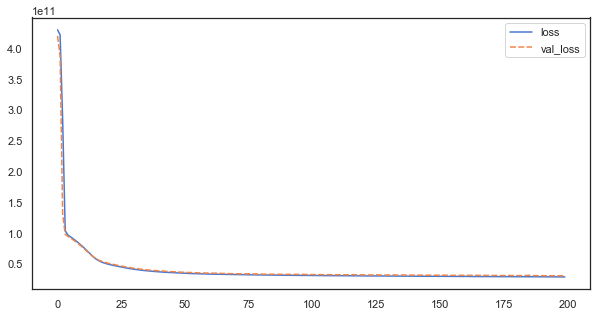

In [518]:
#Analyse loss plots
model_history = pd.DataFrame(model.history.history)
#evaluation plots
plt.figure(figsize = (10, 5))
sns.lineplot(data = model_history)

In [519]:
'''
observations: 
    1. Training loss and testing loss are following the same pattern
    2. After end of the training, the loss is still high 
        => High bias problem => need more layers
    3. After 150 epochs there is not much of difference in loss
        => Enough to train for 150 epoachs
'''
#Training the model further with more number of layers
model = Sequential()
num_feat = X_test.shape[1] #number of features
#Hidden layers
model.add(Dense(num_feat, activation = 'relu')) #have activation units atleast the no. of features  
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
model.add(Dense(num_feat, activation = 'relu'))
#Out put layer
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')
 # as batch size increses, training becomes faster
model.fit(X_train, y_train, batch_size = 128, epochs = 150, validation_data = (X_test, y_test))

Train on 15117 samples, validate on 6480 samples
Epoch 1/150
15117/15117 [==============================] - 2s 104us/sample - loss: 429557494915.6155 - val_loss: 418123513613.2740
Epoch 2/150
15117/15117 [==============================] - 0s 29us/sample - loss: 292478388595.7478 - val_loss: 101715166741.4914
Epoch 3/150
15117/15117 [==============================] - 0s 32us/sample - loss: 95205937276.3675 - val_loss: 91607361763.5556
Epoch 4/150
15117/15117 [==============================] - 0s 31us/sample - loss: 88364674680.7435 - val_loss: 84373354703.3284
Epoch 5/150
15117/15117 [==============================] - 0s 31us/sample - loss: 79531702961.4405 - val_loss: 75562755605.4914
Epoch 6/150
15117/15117 [==============================] - 1s 41us/sample - loss: 69290751458.2290 - val_loss: 65851624885.4123
Epoch 7/150
15117/15117 [==============================] - 0s 30us/sample - loss: 59521945301.6805 - val_loss: 57878616129.7383
Epoch 8/150
15117/15117 [=========================

15117/15117 [==============================] - 0s 28us/sample - loss: 30213804634.1936 - val_loss: 31695184266.4296
Epoch 65/150
15117/15117 [==============================] - 0s 29us/sample - loss: 30278994978.1401 - val_loss: 31852667289.6000
Epoch 66/150
15117/15117 [==============================] - 0s 30us/sample - loss: 30219887295.1236 - val_loss: 31671078042.2321
Epoch 67/150
15117/15117 [==============================] - 0s 30us/sample - loss: 29998248593.4680 - val_loss: 31939046149.6889
Epoch 68/150
15117/15117 [==============================] - 0s 30us/sample - loss: 30153004364.3919 - val_loss: 31592423545.3630
Epoch 69/150
15117/15117 [==============================] - 0s 30us/sample - loss: 30082889277.2693 - val_loss: 31407583757.9062
Epoch 70/150
15117/15117 [==============================] - 0s 30us/sample - loss: 30140305931.0752 - val_loss: 31416058493.1556
Epoch 71/150
15117/15117 [==============================] - 0s 30us/sample - loss: 30049768254.4717 - val_loss

15117/15117 [==============================] - 0s 26us/sample - loss: 27298278667.0921 - val_loss: 29250444513.0272
Epoch 128/150
15117/15117 [==============================] - 0s 26us/sample - loss: 27273337370.5195 - val_loss: 29418714908.4444
Epoch 129/150
15117/15117 [==============================] - 0s 25us/sample - loss: 27184360661.1725 - val_loss: 29352522648.3358
Epoch 130/150
15117/15117 [==============================] - 0s 25us/sample - loss: 27251988464.9621 - val_loss: 29220902239.4469
Epoch 131/150
15117/15117 [==============================] - 0s 26us/sample - loss: 27133125919.7862 - val_loss: 29337951861.5704
Epoch 132/150
15117/15117 [==============================] - 0s 27us/sample - loss: 27227524302.5341 - val_loss: 29115094670.8543
Epoch 133/150
15117/15117 [==============================] - 0s 26us/sample - loss: 27260515962.2338 - val_loss: 29691994900.8593
Epoch 134/150
15117/15117 [==============================] - 0s 25us/sample - loss: 27184707769.7384 - v

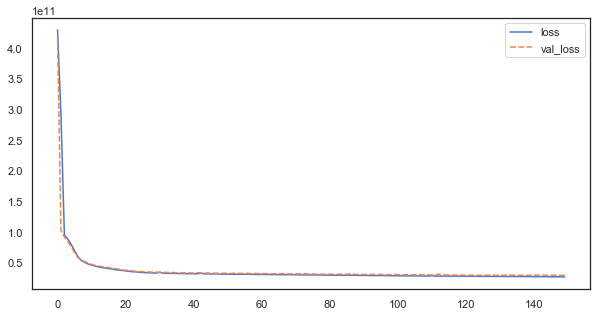

In [520]:
#Analyse loss plots
model_history = pd.DataFrame(model.history.history)
#evaluation plots
plt.figure(figsize = (10, 5))
sns.lineplot(data = model_history)

In [521]:
'''
observations: 
    1. Training loss and testing loss are following the same pattern
    2. After end of the training, the loss is still high 
    3. Even after incresing the number of layers 3 -> 5 -> 7 still the loss is high

We can still go with the model and see how it performs on validation/test data. 
Based on the outcome, next steps can be planned off.
'''

'\nobservations: \n    1. Training loss and testing loss are following the same pattern\n    2. After end of the training, the loss is still high \n    3. Even after incresing the number of layers 3 -> 5 -> 7 still the loss is high\n\nWe can still go with the model and see how it performs on validation/test data. \nBased on the outcome, next steps can be planned off.\n'

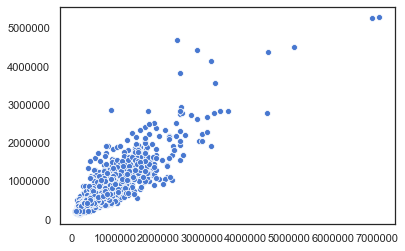

In [522]:
#Evaluate the model
y_pred = model.predict(X_test)
#compare predictions and label data
y_pred = y_pred.reshape(y_test.shape)

#Qualitative analysis
sns.scatterplot(y_test, y_pred)

#seems prediction are close to actual values

In [523]:
#Evaluate model
#Quantitave analysis of predictions wrt label data

from sklearn.metrics import mean_absolute_error, explained_variance_score

mean_absolute_error(y_test, y_pred)

106695.27346884646

In [524]:
pd.Series(y_test).describe()

count    6.480000e+03
mean     5.362372e+05
std      3.641688e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.400000e+05
max      7.060000e+06
dtype: float64

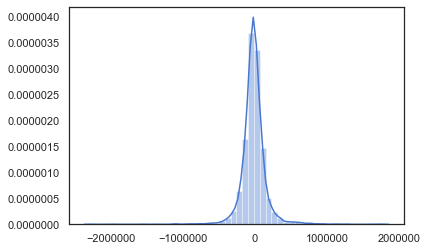

In [525]:
#prediction error distribution
err = y_test - y_pred
sns.distplot(err)

In [526]:
#quantitative analysis - explained_variance_score
explained_variance_score(y_test, y_pred)
#seems there is strong correlation b/w predictions and expectations = 77%

0.7781134485681008

## Predicting on a new data

In [535]:
#Get a new sample and check how the model performs on un seen data
#Using input data only to check the o/p. (brand new data can be kept only for this purpose)
new_house_data = df.drop('price', axis = 1).iloc[0].values
new_house_data_price = df.loc[[0], ['price']].values
new_house_data

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [536]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [537]:
len(new_house_data)

19

In [538]:
#scale the i/p features using pre-determined scaler model weights
new_house_data = new_house_data.reshape(-1, len(new_house_data))
new_house_data = scaler.transform(new_house_data)
#predict the model output
new_house_data_price_pred = model.predict(new_house_data)

In [539]:
new_house_data

array([[0.2       , 0.06666667, 0.06150342, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00574235, 0.        , 0.81818182]])

In [540]:
(new_house_data_price, new_house_data_price_pred)

(array([[221900.]]), array([[286648.34]], dtype=float32))

In [541]:
#error in prediction
new_house_data_price - new_house_data_price_pred

array([[-64748.34375]])